# Logistic Regression from Scratch (using Numpy) |  Take 2

## Import Numpy (and Pandas for Preprocessing)

In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Check Data (pandas)

In [316]:
# Read in Pandas
df = pd.read_csv("creditcard.csv")
df.head()
print("Number of Observations:", len(df))
print("Number of Variables:", len(df.columns))

Number of Observations: 284807
Number of Variables: 31


In [317]:
# Check for Null Columns
null_index = {}
for col in list(df.columns):
    null_index[col] = int(df[col].isnull().sum())

In [318]:
# View Dictionary
null_index

{'Time': 0,
 'V1': 0,
 'V2': 0,
 'V3': 0,
 'V4': 0,
 'V5': 0,
 'V6': 0,
 'V7': 0,
 'V8': 0,
 'V9': 0,
 'V10': 0,
 'V11': 0,
 'V12': 0,
 'V13': 0,
 'V14': 0,
 'V15': 0,
 'V16': 0,
 'V17': 0,
 'V18': 0,
 'V19': 0,
 'V20': 0,
 'V21': 0,
 'V22': 0,
 'V23': 0,
 'V24': 0,
 'V25': 0,
 'V26': 0,
 'V27': 0,
 'V28': 0,
 'Amount': 0,
 'Class': 0}

In [319]:
# Change to Numpy
X_all = df.drop(columns = ["Class"]).values[:, 1:]
y_all = df["Class"].values

## Normalize

In [320]:
def normalize(X):
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    return (X-mean)/std

In [321]:
X_all = normalize(X_all)

## Train Test Split

In [ ]:
#TODO: Train Test Split function

## Logistic Regression Model

In [322]:
class LogisticRegression():
    def __init__(self):
        self.weights = None
        self.costs = None

    def sigmoid(self, z):
        sig = 1/(1+np.exp(-z))
        return sig

    def fit(self, X, y, learning_rate = 0.01, iterations = 1000, stopping_threshold = 0.0001):
        # Create Bias Column
        col_ones = np.ones(shape=(X.shape[0],1))
        X = np.concatenate((col_ones, X), axis = 1)

        # Reshape y
        y = y.reshape(-1, 1)

        # Initialize Weights
        self.weights = np.zeros((X.shape[1], 1))

        # Num Cols
        m = X.shape[0]

        # Costs
        costs = []
        cost = 99999 # initialize cost

        # Precompute Transpose
        X_transpose = X.T

        # Gradient Descent
        for i in range(iterations):
            cost_prev = cost

            # Compute Hypothesis Function
            h = self.sigmoid(np.dot(X, self.weights))
            h = np.clip(h, 1e-15, 1 - 1e-15)

            # Compute Gradient
            grad = (1/m) * np.dot(X_transpose, h-y)

            # Update Weights
            self.weights -= learning_rate * grad

            # Compute Cost
            cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
            costs.append(cost)
            # print("Iteration:", i)
            # print("Cost:", cost)

            # Stopping Criteria
            if abs(cost_prev-cost) <= stopping_threshold:
                self.costs = costs
                break

        self.costs = costs

    def predict(self, X):
        # Create Bias Column
        col_ones = np.ones(shape=(X.shape[0],1))
        X = np.concatenate((col_ones, X), axis = 1)

        p = self.sigmoid(np.dot(X, self.weights))
        p = p >= 0.5
        p = p.astype(int)
        return p

## Accuracy Score

In [323]:
def accuracy_score(y_pred, y_true, r=2):
    y_true = y_true.reshape(-1, 1)
    accuracy_score = (y_pred == y_true).sum() / len(y_true)
    accuracy_score = round(accuracy_score, r)
    return accuracy_score

## Function Calls

### Fit Model

In [324]:
model = LogisticRegression()
model.fit(X_all, y_all, learning_rate = 0.5)

### Get Predictions and Accuracy

In [325]:
p = model.predict(X_all)
accuracy = accuracy_score(p, y_all)
print(f"Accuracy Score: {accuracy*100}%")

Accuracy Score: 100.0%


### Plot Gradient

Text(0.5, 1.0, 'Costs vs Iterations')

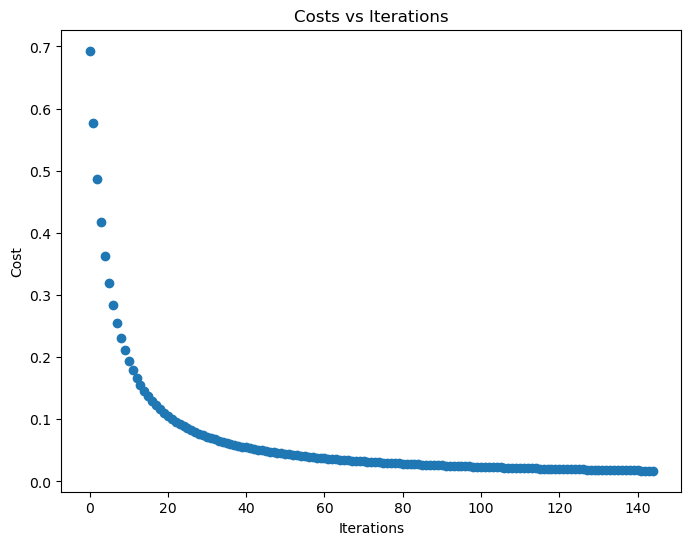

In [326]:
plt.figure(figsize=(8,6))
plt.scatter(range(len(model.costs)), model.costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Costs vs Iterations")